### 輸入股票代碼/移動平均天數，回傳股票資料

In [6]:
%matplotlib inline

import io
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
egg = input('請輸入三個移動平均天數：')

請輸入三個移動平均天數：5 10 20


In [20]:
egg = egg.split()
ma1 = int(egg[0])
ma2 = int(egg[1])
ma3 = int(egg[2])

In [21]:
ma1

5

In [22]:
def crawl_price(stock_id):
    now = int(datetime.datetime.now().timestamp())+186400 #用datatime讓period2到現在
    site = "https://query1.finance.yahoo.com/v7/finance/download/" + stock_id + "?period1=1549258000&period2=" + str(now) + "&interval=1d&events=history&crumb=hP2rOschxO0"

    response = requests.post(site)

    f = io.StringIO(response.text)
    df = pd.read_csv(f, index_col='Date', parse_dates=['Date'] )
    df = df.drop('Volume', axis = 1)
    
    ma_list = [ma1, ma2, ma3]
    for ma in ma_list:
        df['MA_' + str(ma)] = df['Adj Close'].rolling(ma).mean()
    
    return df

In [23]:
ham = input('請輸入想搜尋的股票代碼：')

請輸入想搜尋的股票代碼：2330


台股 2330


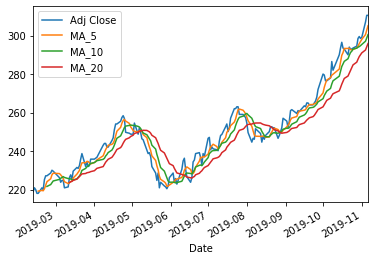

In [28]:
df = crawl_price(str(ham) + '.TW')
stock = '台股 ' + str(ham)
print(stock)
df.iloc[:, 4: 8].plot(); #iloc只需記標籤對應的索引即可

In [27]:
df

,Open,High,Low,Close,Adj Close,MA_5,MA_10,MA_20
Date,,,,,,,,
2019-02-11,228.0,229.0,226.5,228.0,219.007080,NaN,NaN,NaN
2019-02-12,230.0,230.0,229.0,230.0,220.928177,NaN,NaN,NaN
2019-02-13,232.0,232.0,228.5,229.0,219.967636,NaN,NaN,NaN
2019-02-14,229.5,230.0,226.0,227.0,218.046524,NaN,NaN,NaN
2019-02-15,229.0,229.0,226.5,227.0,218.046524,219.199188,NaN,NaN
2019-02-18,229.0,230.5,228.5,230.0,220.928177,219.583408,NaN,NaN
2019-02-19,230.0,230.5,229.0,229.0,219.967636,219.391299,NaN,NaN
2019-02-20,231.5,234.5,231.0,234.5,225.250687,220.447910,NaN,NaN
2019-02-21,235.5,236.5,234.5,236.5,227.171799,222.272965,NaN,NaN
